In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,645,180237,45086,5033,24648,21282,4636,20264,20798,237,5297,456,857,1910
2020-04-22,681,186914,47412,5279,25085,21717,4636,21111,21342,238,5391,513,970,2078
2020-04-23,721,193667,49724,5575,25549,22157,4636,21840,21858,240,5481,555,1069,2241
2020-04-24,780,199999,51493,5760,25969,22524,4636,22853,22248,240,5574,615,1221,2402
2020-04-25,825,206187,53755,5877,26384,22902,4636,23697,22617,242,5650,681,1305,2571
2020-04-26,881,209900,54881,5976,26644,23190,4637,24117,22859,243,5710,747,1351,2687
2020-04-27,939,214484,56259,6126,26977,23521,4637,24458,23296,244,5806,794,1434,2841
2020-04-28,1008,220799,58355,6314,27359,23822,4637,25369,23663,246,5877,867,1569,2983
2020-04-29,1079,227665,60967,6467,27682,24275,4637,26166,24090,247,5957,972,1732,3155


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


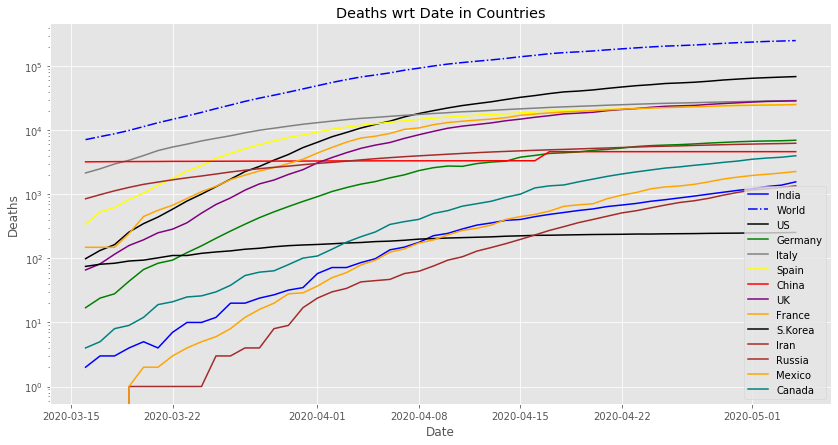

In [11]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

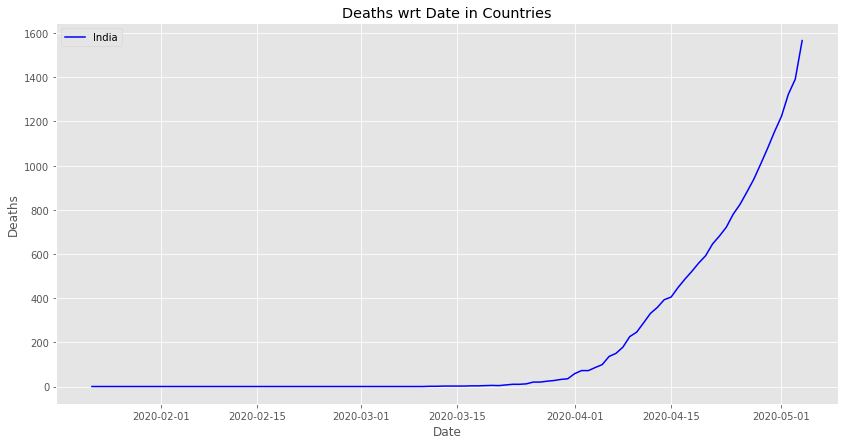

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

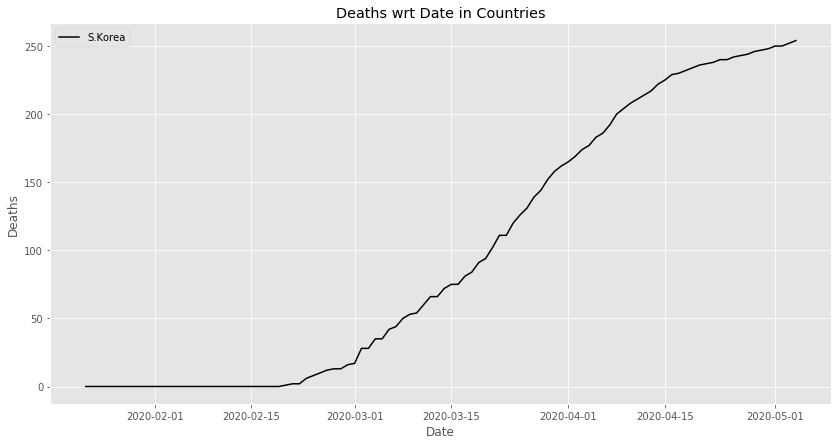

In [13]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,32250,9011850,2254300,251650,1232400,1064100,231800,1013200,1039900,11850,264850,22800,42850,95500
2020-04-22,34050,9345700,2370600,263950,1254250,1085850,231800,1055550,1067100,11900,269550,25650,48500,103900
2020-04-23,36050,9683350,2486200,278750,1277450,1107850,231800,1092000,1092900,12000,274050,27750,53450,112050
2020-04-24,39000,9999950,2574650,288000,1298450,1126200,231800,1142650,1112400,12000,278700,30750,61050,120100
2020-04-25,41250,10309350,2687750,293850,1319200,1145100,231800,1184850,1130850,12100,282500,34050,65250,128550
2020-04-26,44050,10495000,2744050,298800,1332200,1159500,231850,1205850,1142950,12150,285500,37350,67550,134350
2020-04-27,46950,10724200,2812950,306300,1348850,1176050,231850,1222900,1164800,12200,290300,39700,71700,142050
2020-04-28,50400,11039950,2917750,315700,1367950,1191100,231850,1268450,1183150,12300,293850,43350,78450,149150
2020-04-29,53950,11383250,3048350,323350,1384100,1213750,231850,1308300,1204500,12350,297850,48600,86600,157750


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,495,93575,28895,3017,7521,7237,1301,12781,10455,45,1425,398,716,1535
2020-04-22,503,93560,29142,2930,7416,6925,1299,12592,10455,38,1398,450,796,1671
2020-04-23,495,92785,29469,2968,7270,6710,1297,12217,9630,36,1371,479,875,1738
2020-04-24,534,91886,29160,2993,7120,6443,1296,12077,9033,32,1342,521,988,1845
2020-04-25,537,92041,29413,3141,6916,6296,1293,12081,8766,31,1293,575,1032,1917
2020-04-26,550,90047,28795,2954,6745,5981,1294,11815,8447,29,1236,617,1055,1973
2020-04-27,581,88923,28389,2932,6512,5765,1292,11411,8310,27,1221,646,1102,2060
2020-04-28,615,88360,28093,3020,6292,5766,1292,11274,7932,24,1194,697,1163,2082
2020-04-29,674,87007,28233,2663,6037,5567,1291,11225,6921,22,1180,774,1283,2147


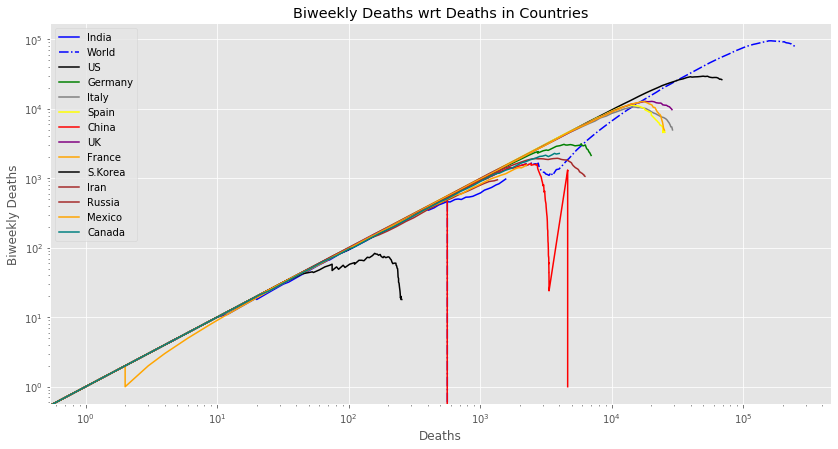

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

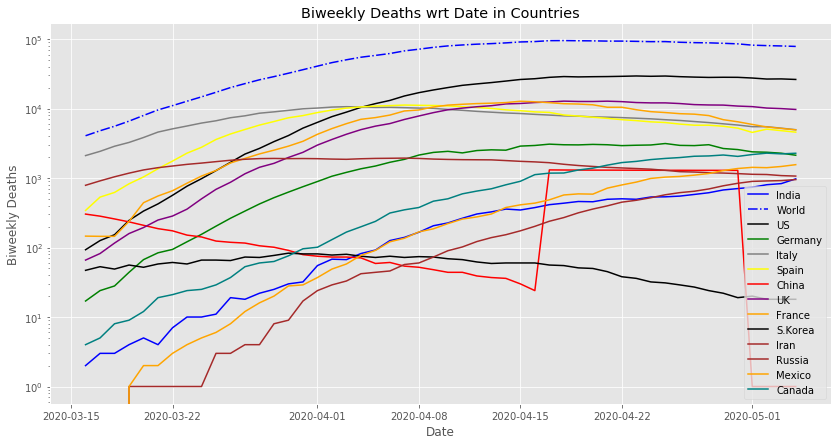

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,355,25927,13712,1158,-2786,-4000,1247,5807,1214,-27,-513,341,580,1186
2020-04-22,337,21991,12188,787,-2750,-4220,1247,4768,901,-36,-518,390,628,1294
2020-04-23,289,16691,10940,628,-2794,-4372,1249,3473,-900,-37,-505,406,689,1273
2020-04-24,308,12061,9092,568,-2595,-4500,1252,2464,-2185,-37,-512,431,767,1342
2020-04-25,273,9692,7802,838,-2529,-4328,1249,1922,-2768,-36,-547,473,775,1324
2020-04-26,246,5517,6129,465,-2375,-4425,1255,1185,-3354,-33,-598,495,779,1323
2020-04-27,255,2801,4711,383,-2362,-4275,1255,410,-3646,-32,-607,507,798,1359
2020-04-28,257,159,3198,501,-2347,-3826,1256,-392,-4267,-36,-591,544,786,1282
2020-04-29,327,-3976,2000,-221,-2453,-3754,1261,-616,-5834,-38,-561,600,871,1248


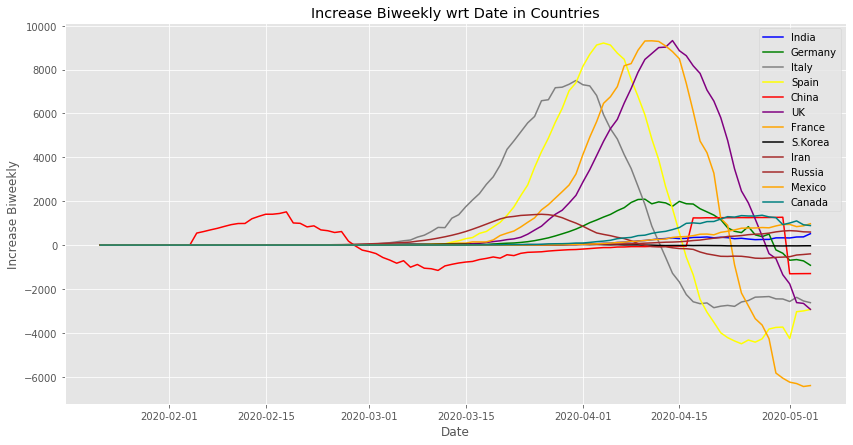

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

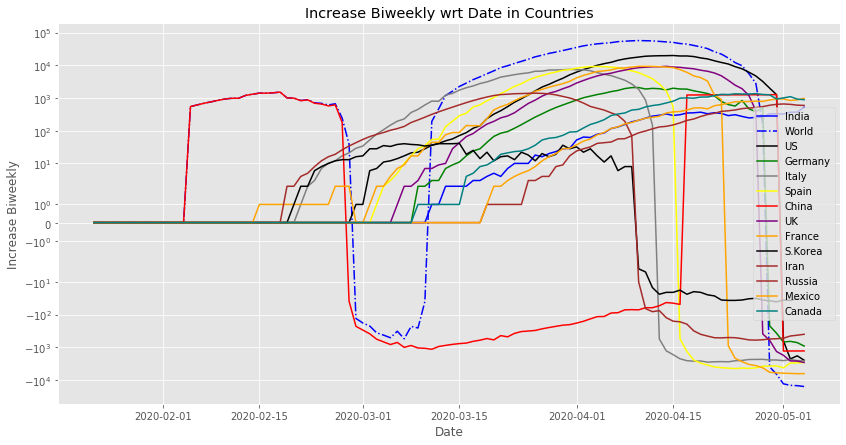

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

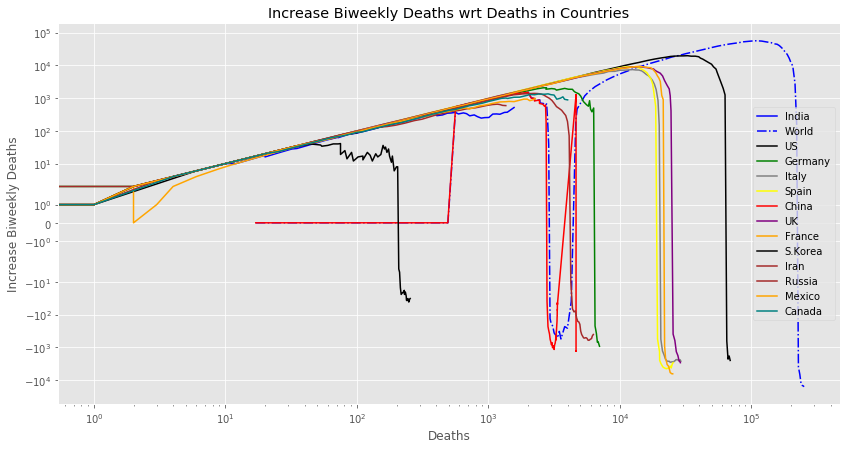

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,0.7172,0.2771,0.4745,0.3838,-0.3704,-0.5527,0.9585,0.4543,0.1161,-0.6000,-0.3600,0.8568,0.8101,0.7726
2020-04-22,0.6700,0.2350,0.4182,0.2686,-0.3708,-0.6094,0.9600,0.3787,0.0862,-0.9474,-0.3705,0.8667,0.7889,0.7744
2020-04-23,0.5838,0.1799,0.3712,0.2116,-0.3843,-0.6516,0.9630,0.2843,-0.0935,-1.0278,-0.3683,0.8476,0.7874,0.7325
2020-04-24,0.5768,0.1313,0.3118,0.1898,-0.3645,-0.6984,0.9660,0.2040,-0.2419,-1.1562,-0.3815,0.8273,0.7763,0.7274
2020-04-25,0.5084,0.1053,0.2653,0.2668,-0.3657,-0.6874,0.9660,0.1591,-0.3158,-1.1613,-0.4230,0.8226,0.7510,0.6907
2020-04-26,0.4473,0.0613,0.2128,0.1574,-0.3521,-0.7398,0.9699,0.1003,-0.3971,-1.1379,-0.4838,0.8023,0.7384,0.6706
2020-04-27,0.4389,0.0315,0.1659,0.1306,-0.3627,-0.7415,0.9714,0.0359,-0.4387,-1.1852,-0.4971,0.7848,0.7241,0.6597
2020-04-28,0.4179,0.0018,0.1138,0.1659,-0.3730,-0.6635,0.9721,-0.0348,-0.5379,-1.5000,-0.4950,0.7805,0.6758,0.6158
2020-04-29,0.4852,-0.0457,0.0708,-0.0830,-0.4063,-0.6743,0.9768,-0.0549,-0.8429,-1.7273,-0.4754,0.7752,0.6789,0.5813


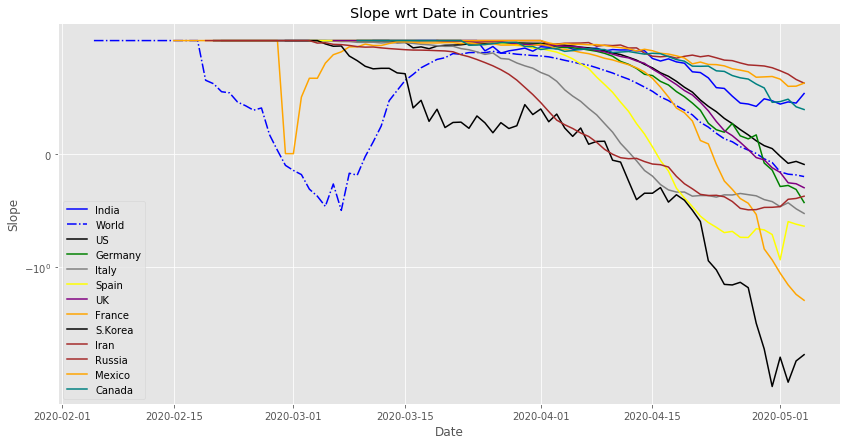

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,225,-26970,-491,-546,-6904,-12464,1335,-665,-6958,-33,-808,285,449,862
2020-04-22,182,-32407,-3486,-1153,-6240,-11772,1319,-2368,-7368,-44,-711,333,466,946
2020-04-23,102,-39337,-5904,-1448,-5470,-11144,1320,-4401,-9780,-45,-576,336,511,845
2020-04-24,100,-44884,-8760,-1522,-4442,-10438,1324,-5996,-11485,-33,-502,345,558,892
2020-04-25,31,-46690,-11136,-1041,-3392,-9165,1311,-6808,-12076,-31,-481,375,534,791
2020-04-26,-33,-50162,-13190,-1502,-2525,-8317,1317,-7816,-12635,-18,-516,381,523,736
2020-04-27,-41,-51032,-14874,-1538,-1803,-6941,1309,-8611,-12721,-8,-531,377,522,734
2020-04-28,-69,-51760,-16463,-1267,-1061,-5487,1299,-9711,-13083,-15,-466,408,438,578
2020-04-29,35,-54107,-17896,-2213,-766,-4311,1306,-9473,-14324,-17,-401,450,496,450


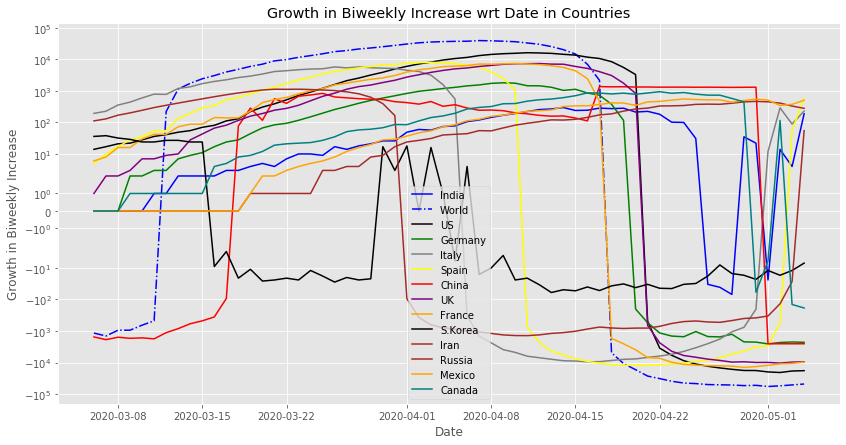

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

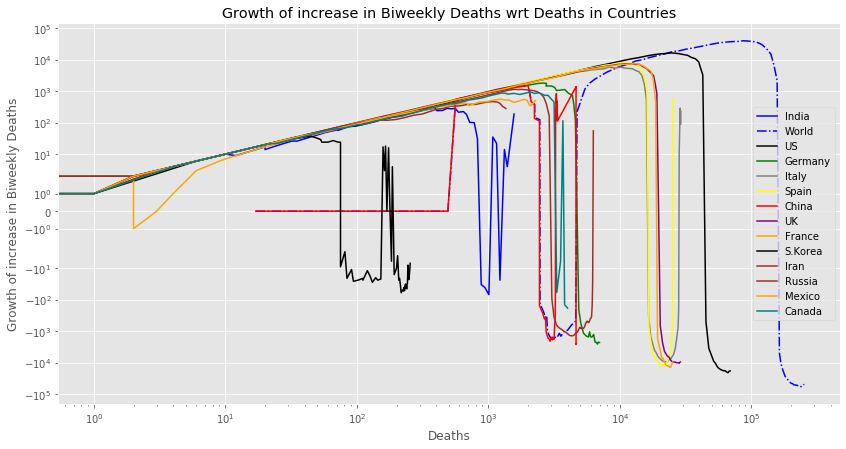

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,0.4545,-0.2882,-0.0170,-0.1810,-0.9180,-1.7223,1.0261,-0.0520,-0.6655,-0.7333,-0.5670,0.7161,0.6271,0.5616
2020-04-22,0.3618,-0.3464,-0.1196,-0.3935,-0.8414,-1.6999,1.0154,-0.1881,-0.7047,-1.1579,-0.5086,0.7400,0.5854,0.5661
2020-04-23,0.2061,-0.4240,-0.2003,-0.4879,-0.7524,-1.6608,1.0177,-0.3602,-1.0156,-1.2500,-0.4201,0.7015,0.5840,0.4862
2020-04-24,0.1873,-0.4885,-0.3004,-0.5085,-0.6239,-1.6201,1.0216,-0.4965,-1.2714,-1.0312,-0.3741,0.6622,0.5648,0.4835
2020-04-25,0.0577,-0.5073,-0.3786,-0.3314,-0.4905,-1.4557,1.0139,-0.5635,-1.3776,-1.0000,-0.3720,0.6522,0.5174,0.4126
2020-04-26,-0.0600,-0.5571,-0.4581,-0.5085,-0.3744,-1.3906,1.0178,-0.6615,-1.4958,-0.6207,-0.4175,0.6175,0.4957,0.3730
2020-04-27,-0.0706,-0.5739,-0.5239,-0.5246,-0.2769,-1.2040,1.0132,-0.7546,-1.5308,-0.2963,-0.4349,0.5836,0.4737,0.3563
2020-04-28,-0.1122,-0.5858,-0.5860,-0.4195,-0.1686,-0.9516,1.0054,-0.8614,-1.6494,-0.6250,-0.3903,0.5854,0.3766,0.2776
2020-04-29,0.0519,-0.6219,-0.6339,-0.8310,-0.1269,-0.7744,1.0116,-0.8439,-2.0696,-0.7727,-0.3398,0.5814,0.3866,0.2096


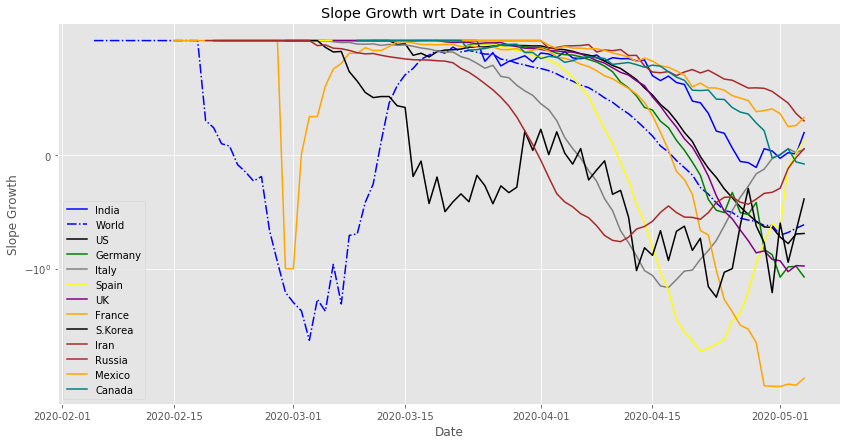

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,4.3000,2.0798,2.7846,2.4965,1.4391,1.5153,1.3901,2.7080,2.0108,1.2344,1.3680,7.8621,6.0780,5.0933
2020-04-22,3.8258,2.0022,2.5951,2.2473,1.4197,1.4682,1.3893,2.4781,1.9603,1.1900,1.3501,8.1429,5.5747,5.1057
2020-04-23,3.1903,1.9197,2.4549,2.1385,1.3977,1.4344,1.3884,2.2696,1.7875,1.1765,1.3336,7.3026,5.5103,4.4553
2020-04-24,3.1707,1.8499,2.3057,2.0817,1.3777,1.4007,1.3880,2.1207,1.6835,1.1538,1.3171,6.5426,5.2403,4.3124
2020-04-25,2.8646,1.8063,2.2083,2.1480,1.3552,1.3791,1.3868,2.0400,1.6329,1.1469,1.2968,6.4245,4.7802,3.9312
2020-04-26,2.6616,1.7513,2.1038,1.9775,1.3390,1.3476,1.3871,1.9604,1.5861,1.1355,1.2763,5.7462,4.5642,3.7633
2020-04-27,2.6229,1.7082,2.0186,1.9180,1.3182,1.3247,1.3862,1.8746,1.5545,1.1244,1.2663,5.3649,4.3193,3.6376
2020-04-28,2.5649,1.6672,1.9283,1.9168,1.2987,1.3193,1.3862,1.7999,1.5042,1.1081,1.2550,5.1000,3.8645,3.3108
2020-04-29,2.6642,1.6186,1.8625,1.7001,1.2789,1.2976,1.3858,1.7513,1.4031,1.0978,1.2470,4.9091,3.8575,3.1300


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,3.5357,1.3833,1.9031,1.6229,0.7297,0.6440,24.0926,1.8327,1.1314,0.6250,0.7353,6.9825,5.2647,4.3983
2020-04-22,3.0301,1.3073,1.7189,1.3672,0.7295,0.6214,24.9808,1.6094,1.0943,0.5135,0.7296,7.5000,4.7381,4.4324
2020-04-23,2.4029,1.2193,1.5904,1.2684,0.7224,0.6055,27.0208,1.3972,0.9145,0.4932,0.7308,6.5616,4.7043,3.7376
2020-04-24,2.3628,1.1511,1.4531,1.2342,0.7329,0.5888,29.4545,1.2563,0.8052,0.4638,0.7238,5.7889,4.4706,3.6680
2020-04-25,2.0341,1.1177,1.3610,1.3639,0.7322,0.5926,29.3864,1.1892,0.7600,0.4627,0.7027,5.6373,4.0156,3.2327
2020-04-26,1.8092,1.0653,1.2704,1.1868,0.7396,0.5748,33.1795,1.1115,0.7158,0.4677,0.6739,5.0574,3.8225,3.0354
2020-04-27,1.7822,1.0325,1.1990,1.1503,0.7338,0.5742,34.9189,1.0373,0.6950,0.4576,0.6679,4.6475,3.6250,2.9387
2020-04-28,1.7179,1.0018,1.1285,1.1989,0.7283,0.6011,35.8889,0.9664,0.6502,0.4000,0.6689,4.5556,3.0849,2.6025
2020-04-29,1.9424,0.9563,1.0762,0.9234,0.7111,0.5973,43.0333,0.9480,0.5426,0.3667,0.6778,4.4483,3.1141,2.3882


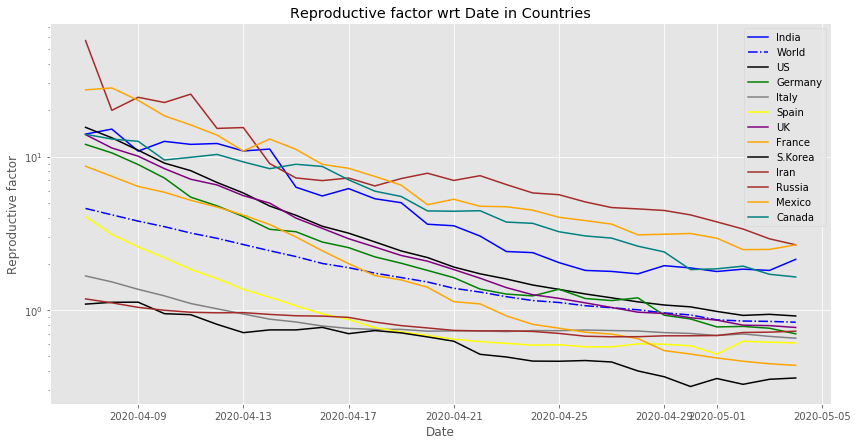

In [31]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

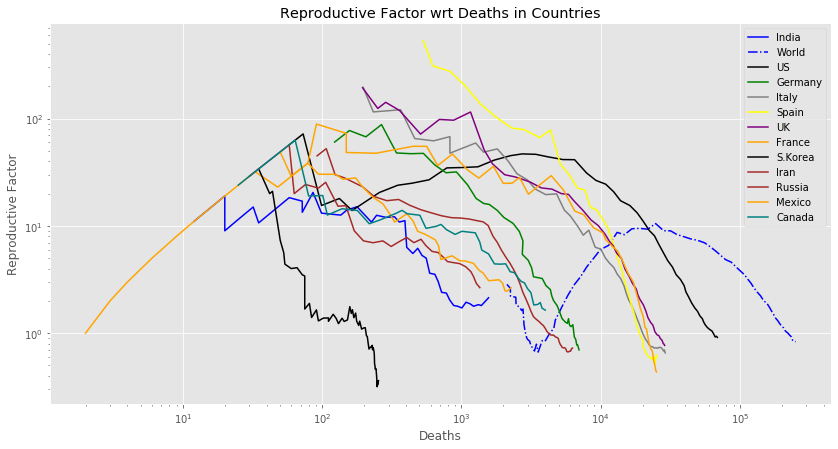

In [32]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,53,7139,2427,171,534,430,0,1172,531,1,88,51,145,183
2020-04-22,36,6677,2326,246,437,435,0,847,544,1,94,57,113,168
2020-04-23,40,6753,2312,296,464,440,0,729,516,2,90,42,99,163
2020-04-24,59,6332,1769,185,420,367,0,1013,390,0,93,60,152,161
2020-04-25,45,6188,2262,117,415,378,0,844,369,2,76,66,84,169
2020-04-26,56,3713,1126,99,260,288,1,420,242,1,60,66,46,116
2020-04-27,58,4584,1378,150,333,331,0,341,437,1,96,47,83,154
2020-04-28,69,6315,2096,188,382,301,0,911,367,2,71,73,135,142
2020-04-29,71,6866,2612,153,323,453,0,797,427,1,80,105,163,172


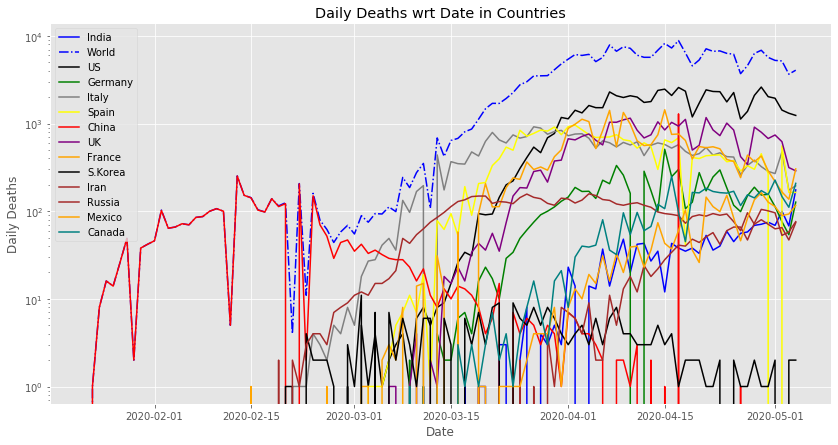

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

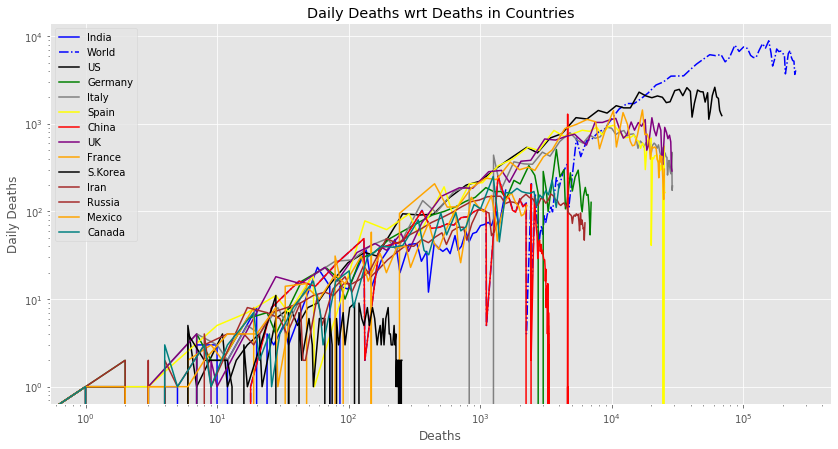

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [36]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-04-21,138675.0,18742846.0,6277324.0,628244.0,1773547.0,1612431.0,322225.0,2743746.0,2091031.0,14628.0,362315.0,179256.0,260442.0,486410.0
2020-04-22,130268.0,18711961.0,6151944.0,593175.0,1780659.0,1594245.0,322040.0,2615758.0,2091836.0,14161.0,363919.0,208865.0,270373.0,530482.0
2020-04-23,115010.0,18589127.0,6103372.0,596107.0,1785492.0,1589100.0,321831.0,2478403.0,1953559.0,14118.0,365473.0,202647.0,294526.0,499216.0
2020-04-24,123657.0,18498908.0,5936371.0,599530.0,1788875.0,1577468.0,321738.0,2423218.0,1872725.0,13846.0,367076.0,201185.0,319920.0,517919.0
2020-04-25,118165.0,18621779.0,5935358.0,631190.0,1787780.0,1579207.0,321460.0,2417094.0,1846565.0,13877.0,366346.0,218754.0,311908.0,505356.0
2020-04-26,117243.0,18379894.0,5772932.0,590877.0,1783816.0,1562542.0,321599.0,2363948.0,1812833.0,13796.0,364384.0,214621.0,308312.0,505599.0
2020-04-27,123145.0,18319078.0,5678221.0,587483.0,1778054.0,1557913.0,321390.0,2292448.0,1810682.0,13718.0,367607.0,212987.0,309694.0,516721.0
2020-04-28,129271.0,18405805.0,5626297.0,605134.0,1776557.0,1571418.0,321390.0,2283083.0,1779694.0,13630.0,368782.0,221085.0,303170.0,493806.0
2020-04-29,143734.0,18424928.0,5677552.0,549727.0,1770125.0,1574962.0,321298.0,2291226.0,1690034.0,13558.0,371419.0,238582.0,334060.0,493758.0


In [37]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [38]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1200]

In [39]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,251537,78439,-15892,-48215,-0.2026,-0.6147,12576850,1.4531,0.8315,4067,18275421.0
US,68922,26263,-2502,-18159,-0.0953,-0.6914,3446100,1.6156,0.9130,1240,5567519.0
Italy,29079,4965,-2626,229,-0.5289,0.0461,1453950,1.2059,0.6541,195,1753318.0
UK,28809,9717,-2930,-9492,-0.3015,-0.9768,1440450,1.5090,0.7683,289,2173639.0
Spain,25428,4576,-2935,584,-0.6414,0.1276,1271400,1.2195,0.6092,164,1550472.0
France,25204,4937,-6404,-9681,-1.2971,-1.9609,1260200,1.2436,0.4353,304,1567185.0
Belgium,7924,2096,-2100,-4752,-1.0019,-2.2672,396200,1.3596,0.4995,80,538674.0
Brazil,7367,4780,2757,1264,0.5768,0.2644,368350,2.8477,2.3628,316,1048950.0
Germany,6993,2131,-921,-2286,-0.4322,-1.0727,349650,1.4383,0.6982,127,502902.0


In [40]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
Ecuador,1569,1062,746,603,0.7024,0.5678,78450,3.0947,3.3608,5,242779.0
Russia,1356,951,593,281,0.6236,0.2955,67800,3.3481,2.6564,76,227001.0
Mexico,2271,1559,972,506,0.6235,0.3246,113550,3.1896,2.6559,117,362179.0
Peru,1344,899,546,280,0.6073,0.3115,67200,3.0202,2.5467,58,202957.0
Brazil,7367,4780,2757,1264,0.5768,0.2644,368350,2.8477,2.3628,316,1048950.0
India,1566,974,518,188,0.5318,0.1930,78300,2.6453,2.1360,175,207127.0
Canada,4003,2276,888,-186,0.3902,-0.0817,200150,2.3179,1.6398,208,463928.0
Ireland,1319,632,119,-226,0.1883,-0.3576,65950,1.9199,1.2320,16,126617.0
Sweden,2769,1189,86,-565,0.0723,-0.4752,138450,1.7525,1.0780,90,242634.0
